In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Activation,Input
from tensorflow.keras.optimizers import SGD

from sklearn.impute import SimpleImputer as Imputer

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [21]:
df=pd.read_csv("breast-cancer-wisconsin.data")

Attribute Information:

1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant)

In [22]:
df.shape

(698, 11)

In [23]:
df.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   1000025  698 non-null    int64 
 1   5        698 non-null    int64 
 2   1        698 non-null    int64 
 3   1.1      698 non-null    int64 
 4   1.2      698 non-null    int64 
 5   2        698 non-null    int64 
 6   1.3      698 non-null    object
 7   3        698 non-null    int64 
 8   1.4      698 non-null    int64 
 9   1.5      698 non-null    int64 
 10  2.1      698 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [25]:
# Let's look at the column with object type
df['1.3'].value_counts(dropna=True)

1     401
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: 1.3, dtype: int64

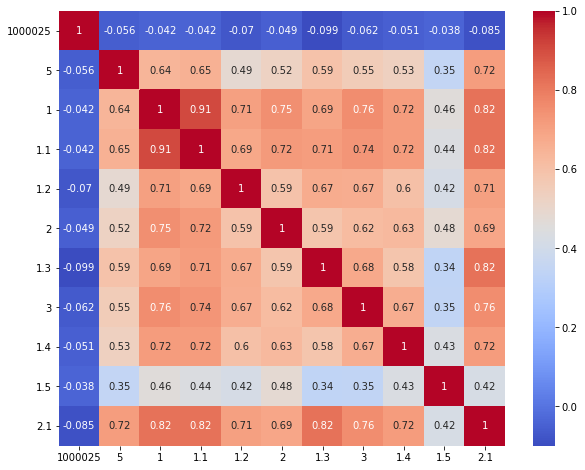

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm',annot=True);

In [26]:
df[df['1.3']=='?']

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
22,1057013,8,4,5,1,2,?,7,3,1,4
39,1096800,6,6,6,9,6,?,7,8,1,2
138,1183246,1,1,1,1,1,?,2,1,1,2
144,1184840,1,1,3,1,2,?,2,1,1,2
157,1193683,1,1,2,1,3,?,1,1,1,2
163,1197510,5,1,1,1,2,?,3,1,1,2
234,1241232,3,1,4,1,2,?,3,1,1,2
248,169356,3,1,1,1,2,?,3,1,1,2
274,432809,3,1,3,1,2,?,2,1,1,2
291,563649,8,8,8,1,2,?,6,10,1,4


In [32]:
# will replace '?' value in dataframe with value -99999 
df.replace('?',np.nan,inplace=True)
df.dropna(inplace=True)

In [33]:
df['1.3']=df['1.3'].astype('int64')

In [10]:
# drop id column 
df.drop(labels=['1000025'], axis=1,inplace=True)
df.head()

,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4


In [11]:
df.shape

(682, 10)

In [12]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
X_train.shape, y_train.shape

((545, 9), (545,))

In [15]:
# from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [16]:
X_train.min(), X_train.max(), X_test.min(), X_test.max()

(0.0, 1.0, 0.0, 1.0)

In [17]:
model = Sequential()
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(2,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics='accuracy')
# normalde ilk once optimizer olarak adam denenir.

In [18]:
model.fit(X_train, y_train, batch_size=32, epochs=250)

Epoch 1/250


ValueError: in user code:

    C:\Users\fatih\anaconda4\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\fatih\anaconda4\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\fatih\anaconda4\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\fatih\anaconda4\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\fatih\anaconda4\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\fatih\anaconda4\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\fatih\anaconda4\lib\site-packages\tensorflow\python\keras\engine\training.py:755 train_step
        loss = self.compiled_loss(
    C:\Users\fatih\anaconda4\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:203 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\fatih\anaconda4\lib\site-packages\tensorflow\python\keras\losses.py:152 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\fatih\anaconda4\lib\site-packages\tensorflow\python\keras\losses.py:256 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\fatih\anaconda4\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\fatih\anaconda4\lib\site-packages\tensorflow\python\keras\losses.py:1608 binary_crossentropy
        K.binary_crossentropy(y_true, y_pred, from_logits=from_logits), axis=-1)
    C:\Users\fatih\anaconda4\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\fatih\anaconda4\lib\site-packages\tensorflow\python\keras\backend.py:4979 binary_crossentropy
        return nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)
    C:\Users\fatih\anaconda4\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\fatih\anaconda4\lib\site-packages\tensorflow\python\ops\nn_impl.py:173 sigmoid_cross_entropy_with_logits
        raise ValueError("logits and labels must have the same shape (%s vs %s)" %

    ValueError: logits and labels must have the same shape ((None, 2) vs (None, 1))


In [ ]:
model.fit(x=X_train, y=y_train, 
          epochs=150,
          validation_data=(X_test, y_test), 
          verbose=1)

In [ ]:
# model_loss = pd.DataFrame(model.history.history)
# model_loss.plot()

In [ ]:
model.summary()

In [ ]:
model.history.history

In [ ]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot();